In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset-mba-decision-after-bachelors/mba_decision_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/dataset-mba-decision-after-bachelors/mba_decision_dataset.csv')

# EDA

According to dataset page source of data is from surver of individuals who have completed their Bachelor's degree and are deciding whether to pursue an MBA. It includes demographic information, academic background, work experience, financial factors, and career aspirations to analyze trends and key drivers behind MBA decisions.

## General Overview

In this section we'll take a look on our data. According to dataset page, here's a description of our features:

* Person ID – Unique identifier
* Age – Age at the time of decision
* Gender – Male, Female, Other
* Undergraduate Major – Engineering, Business, Arts, Science, etc.
* Undergraduate GPA – Scale from 0 to 4
* Years of Work Experience – Years before MBA decision
* Current Job Title – Analyst, Manager, Consultant, etc.
* Annual Salary (Before MBA) – In USD
* Has Management Experience – Yes/No
* GRE/GMAT Score – Standardized test score
* Undergrad University Ranking – Ranking of Bachelor's institution
* Entrepreneurial Interest – Scale from 1 to 10
* Networking Importance – Scale from 1 to 10
* MBA Funding Source – Self-funded, Loan, Scholarship, Employer
* Desired Post-MBA Role – Consultant, Executive, Startup Founder, etc.
* Expected Post-MBA Salary – Expected salary after MBA
* Location Preference (Post-MBA) – Domestic, International
* Reason for MBA – Career Growth, Skill Enhancement, Entrepreneurship, etc.
* Online vs. On-Campus MBA – Preference for learning mode
* Decided to Pursue MBA? – Yes/No (Target Variable)

Let's take a look on first rows of dataset.

In [3]:
df.head()

Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
0          1   27    Male                Arts               3.18   
1          2   24    Male                Arts               3.03   
2          3   33  Female            Business               3.66   
3          4   31    Male         Engineering               2.46   
4          5   28  Female            Business               2.75   

   Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
0                         8      Entrepreneur                       90624   
1                         4           Analyst                       53576   
2                         9          Engineer                       79796   
3                         1           Manager                      105956   
4                         9      Entrepreneur                       96132   

  Has Management Experience  GRE/GMAT Score  Undergrad University Ranking  \
0                        No             688                           185   
1                       Yes             791                           405   
2                        No             430                           107   
3                        No             356                           257   
4                        No             472                           338   

   Entrepreneurial Interest  Networking Importance MBA Funding Source  \
0                       7.9                    7.6               Loan   
1                       3.8                    4.1               Loan   
2                       6.7                    5.5        Scholarship   
3                       1.0                    5.3               Loan   
4                       9.5                    4.9               Loan   

  Desired Post-MBA Role  Expected Post-MBA Salary  \
0       Finance Manager                    156165   
1       Startup Founder                    165612   
2            Consultant                    122248   
3            Consultant                    123797   
4            Consultant                    197509   

  Location Preference (Post-MBA)     Reason for MBA Online vs. On-Campus MBA  \
0                  International   Entrepreneurship                On-Campus   
1                  International      Career Growth                   Online   
2                       Domestic  Skill Enhancement                   Online   
3                  International   Entrepreneurship                On-Campus   
4                       Domestic  Skill Enhancement                   Online   

  Decided to Pursue MBA?  
0                    Yes  
1                     No  
2                     No  
3                     No  
4                    Yes

From first look we can see that our dataset consists of different types of features. 

Interesting how many rows we're having here.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

Not bad, so this dataset contains survey results of 10k students.

Also there's no missing values, so we don't need to worry about imputation methods.

But what about duplicates?

In [5]:
df.duplicated().sum()

0

And there's also no duplicated values. Wonderful, our dataset is clear and we're ready to start further analysis!

But before it let's create summary of our dataset.

In [6]:
df.describe()

Person ID           Age  Undergraduate GPA  Years of Work Experience  \
count  10000.00000  10000.000000       10000.000000               10000.00000   
mean    5000.50000     27.494300           2.991611                   4.53350   
std     2886.89568      4.031823           0.573509                   2.86166   
min        1.00000     21.000000           2.000000                   0.00000   
25%     2500.75000     24.000000           2.490000                   2.00000   
50%     5000.50000     27.000000           2.990000                   5.00000   
75%     7500.25000     31.000000           3.480000                   7.00000   
max    10000.00000     34.000000           4.000000                   9.00000   

       Annual Salary (Before MBA)  GRE/GMAT Score  \
count                10000.000000     10000.00000   
mean                 75166.406400       524.44690   
std                  25850.070599       158.06376   
min                  30013.000000       250.00000   
25%                  52862.000000       390.00000   
50%                  74829.500000       524.00000   
75%                  97273.000000       661.00000   
max                 119966.000000       799.00000   

       Undergrad University Ranking  Entrepreneurial Interest  \
count                   10000.00000              10000.000000   
mean                      247.03620                  5.477830   
std                       144.87624                  2.585864   
min                         1.00000                  1.000000   
25%                       121.00000                  3.200000   
50%                       243.00000                  5.500000   
75%                       373.00000                  7.700000   
max                       499.00000                 10.000000   

       Networking Importance  Expected Post-MBA Salary  
count           10000.000000              10000.000000  
mean                5.522170             130321.228900  
std                 2.588422              40598.421993  
min                 1.000000              60001.000000  
25%                 3.300000              95320.500000  
50%                 5.500000             130155.500000  
75%                 7.700000             165757.000000  
max                10.000000             199999.000000

## Univarite Analysis

In this section we'll vizualize our features one by one to understand their distributions.

### Numerical Features

In [7]:
numerical_features = df.select_dtypes(exclude='object').columns.tolist()
print(f"Numerical features of dataset: {numerical_features}\n")
print(f"Number of numerical features: {len(numerical_features)}")

Numerical features of dataset: ['Person ID', 'Age', 'Undergraduate GPA', 'Years of Work Experience', 'Annual Salary (Before MBA)', 'GRE/GMAT Score', 'Undergrad University Ranking', 'Entrepreneurial Interest', 'Networking Importance', 'Expected Post-MBA Salary']

Number of numerical features: 10


(10, 3)


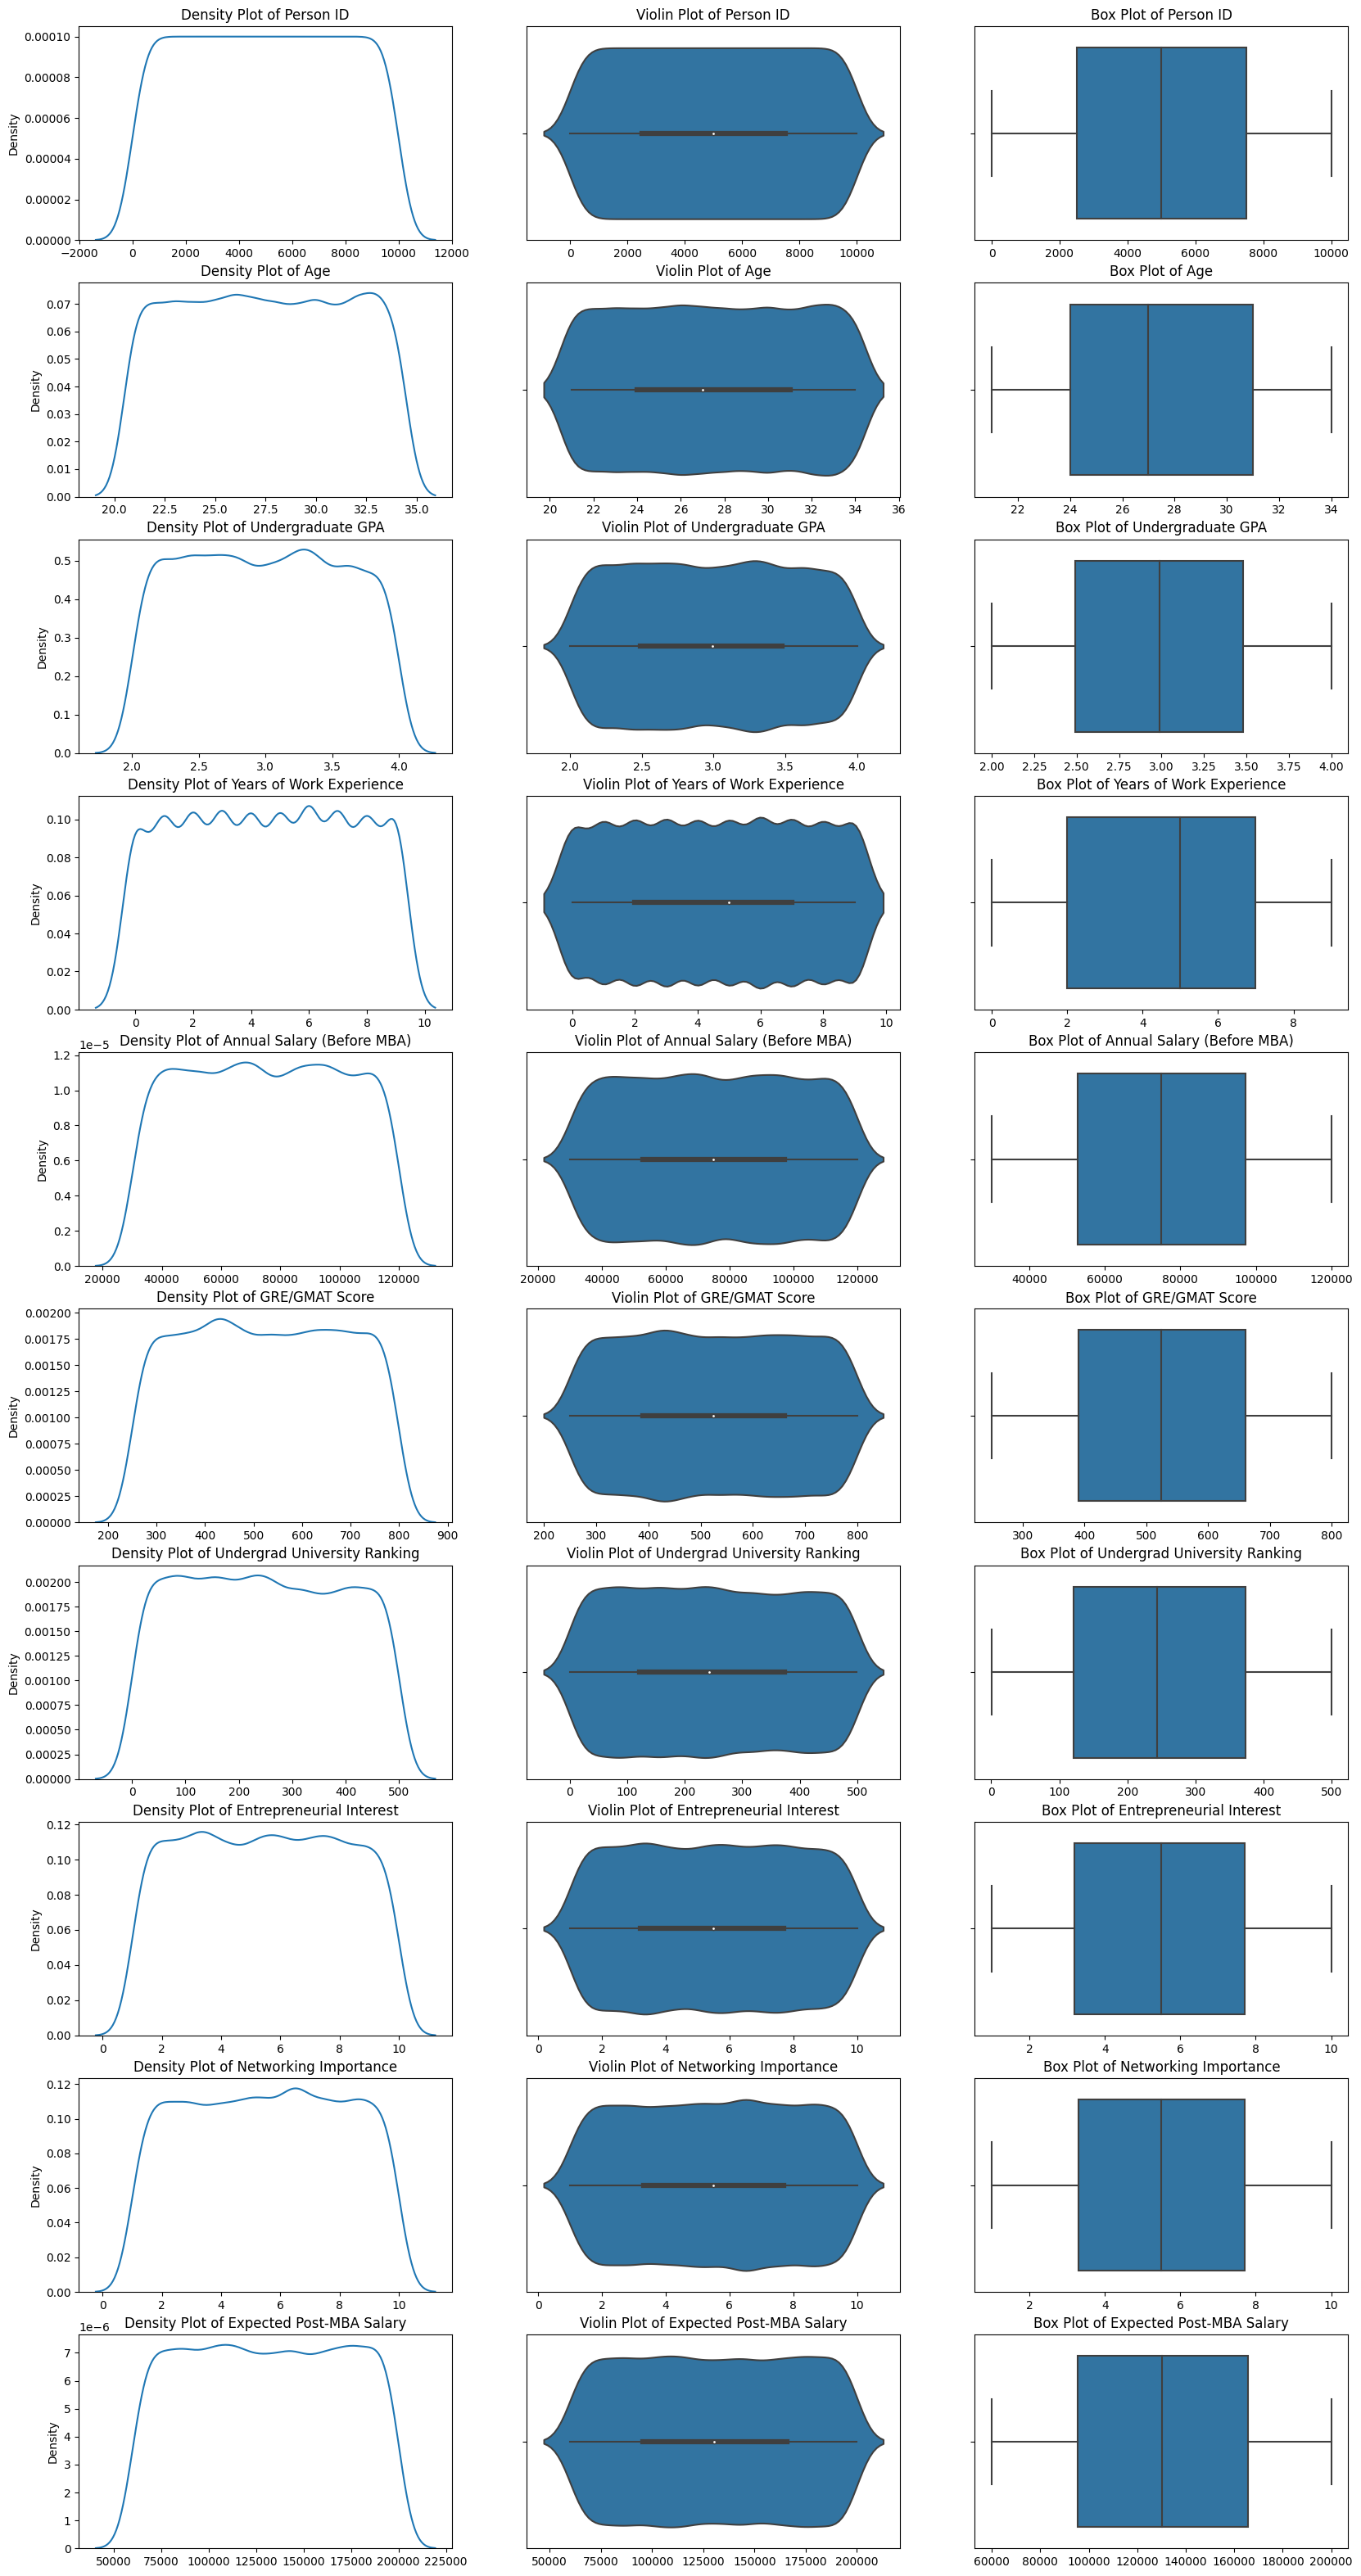

In [8]:
fig, axs = plt.subplots(10, 3, figsize=(20,40))
print(axs.shape)
r = 0
for feat in numerical_features:
    c = 0
    while c<3:
        if c == 0:
            sns.kdeplot(ax=axs[r, c], data=df, x=feat)
            axs[r,c].set_title(f'Density Plot of {feat}')
            axs[r,c].set(xlabel=None)
        elif c == 1:
            sns.violinplot(ax=axs[r,c], data=df, x=feat)
            axs[r,c].set_title(f'Violin Plot of {feat}')
            axs[r,c].set(xlabel=None)
        elif c == 2:
            sns.boxplot(ax=axs[r,c], data=df, x=feat)
            axs[r,c].set_title(f'Box Plot of {feat}')
            axs[r,c].set(xlabel=None)
        c += 1
    r += 1


It seems our features are normally distributed with no outliers. Nothing interesting here.

### Categorical Features

In [9]:
cat_features = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical features of dataset: {cat_features}\n")
print(f"Number of categorical features: {len(cat_features)}")

Categorical features of dataset: ['Gender', 'Undergraduate Major', 'Current Job Title', 'Has Management Experience', 'MBA Funding Source', 'Desired Post-MBA Role', 'Location Preference (Post-MBA)', 'Reason for MBA', 'Online vs. On-Campus MBA', 'Decided to Pursue MBA?']

Number of categorical features: 10


(5, 2)


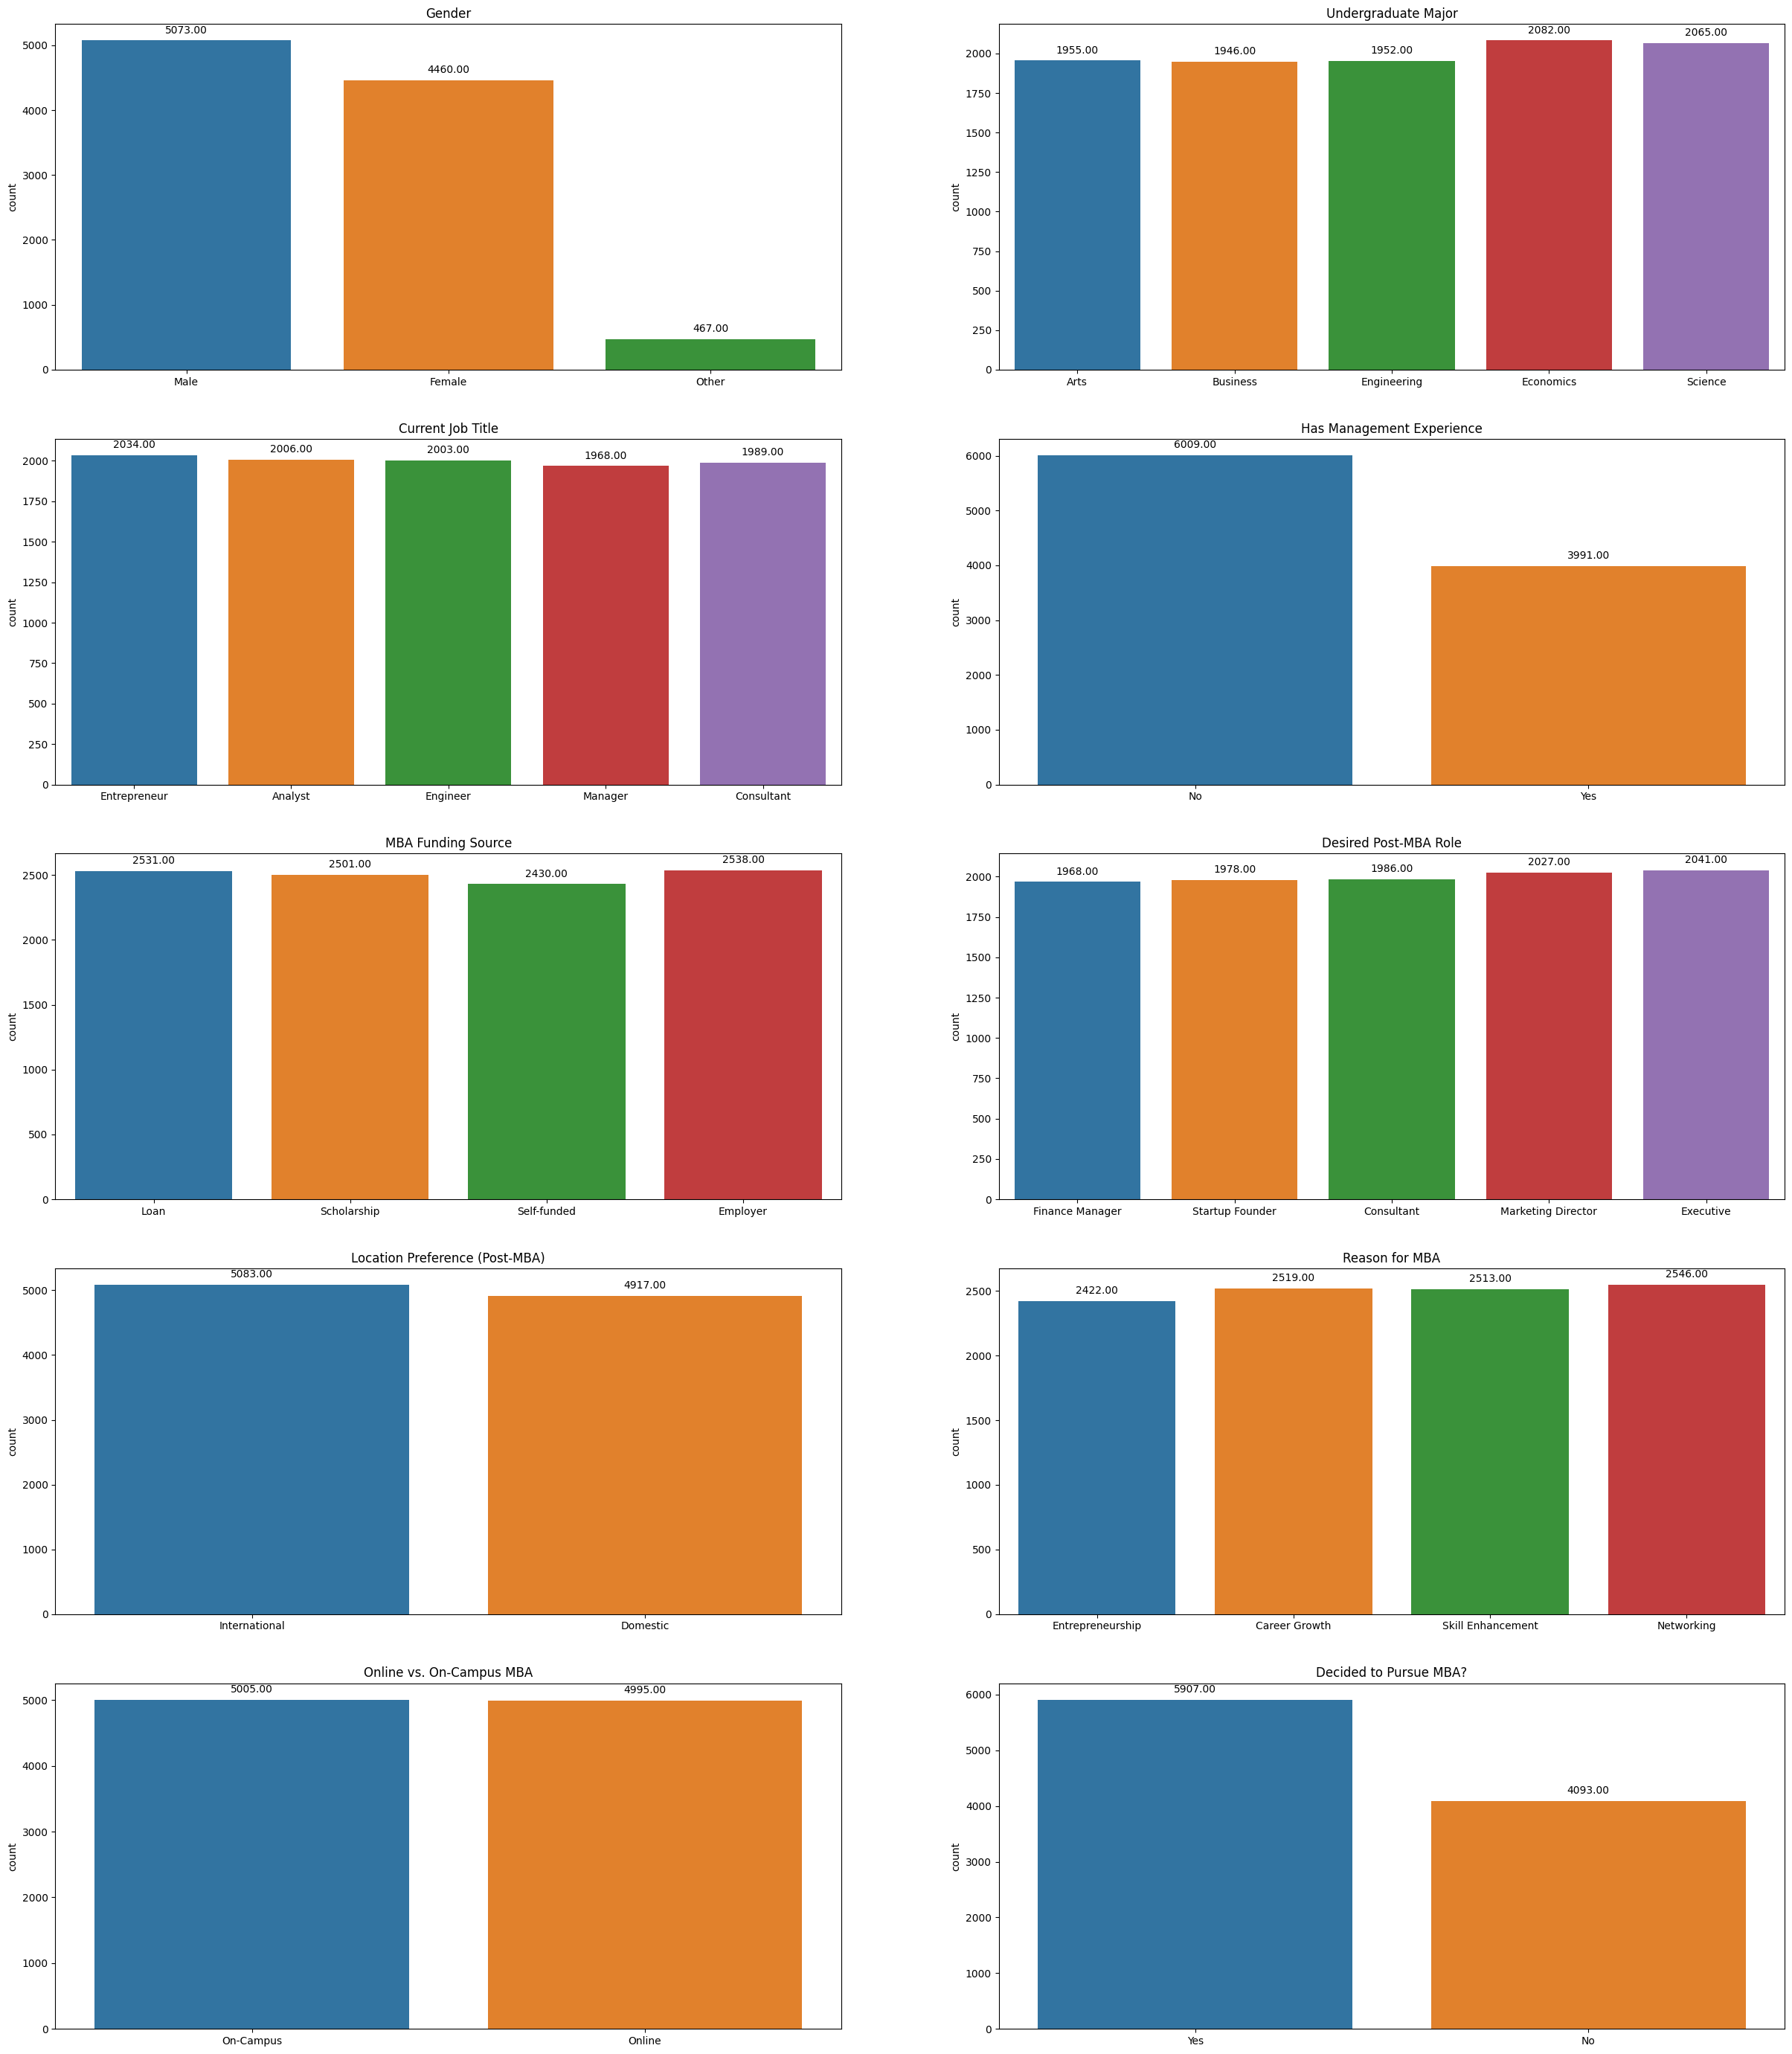

In [10]:
fig, axs = plt.subplots(5,2, figsize=(30,35))
print(axs.shape)
r = 0
c = 0
for feat in cat_features:
    if c == 2:
        c = 0
        r += 1
    counts = sns.countplot(ax=axs[r,c], data=df, x=feat)
    for p in counts.patches:
        counts.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    axs[r,c].set_title(f'{feat}')
    axs[r,c].set(xlabel=None)

  
    c += 1


Categorical features also evenly distributed across categories. But we can see that more students decided to pursue MBA.

## Bivariate Analysis

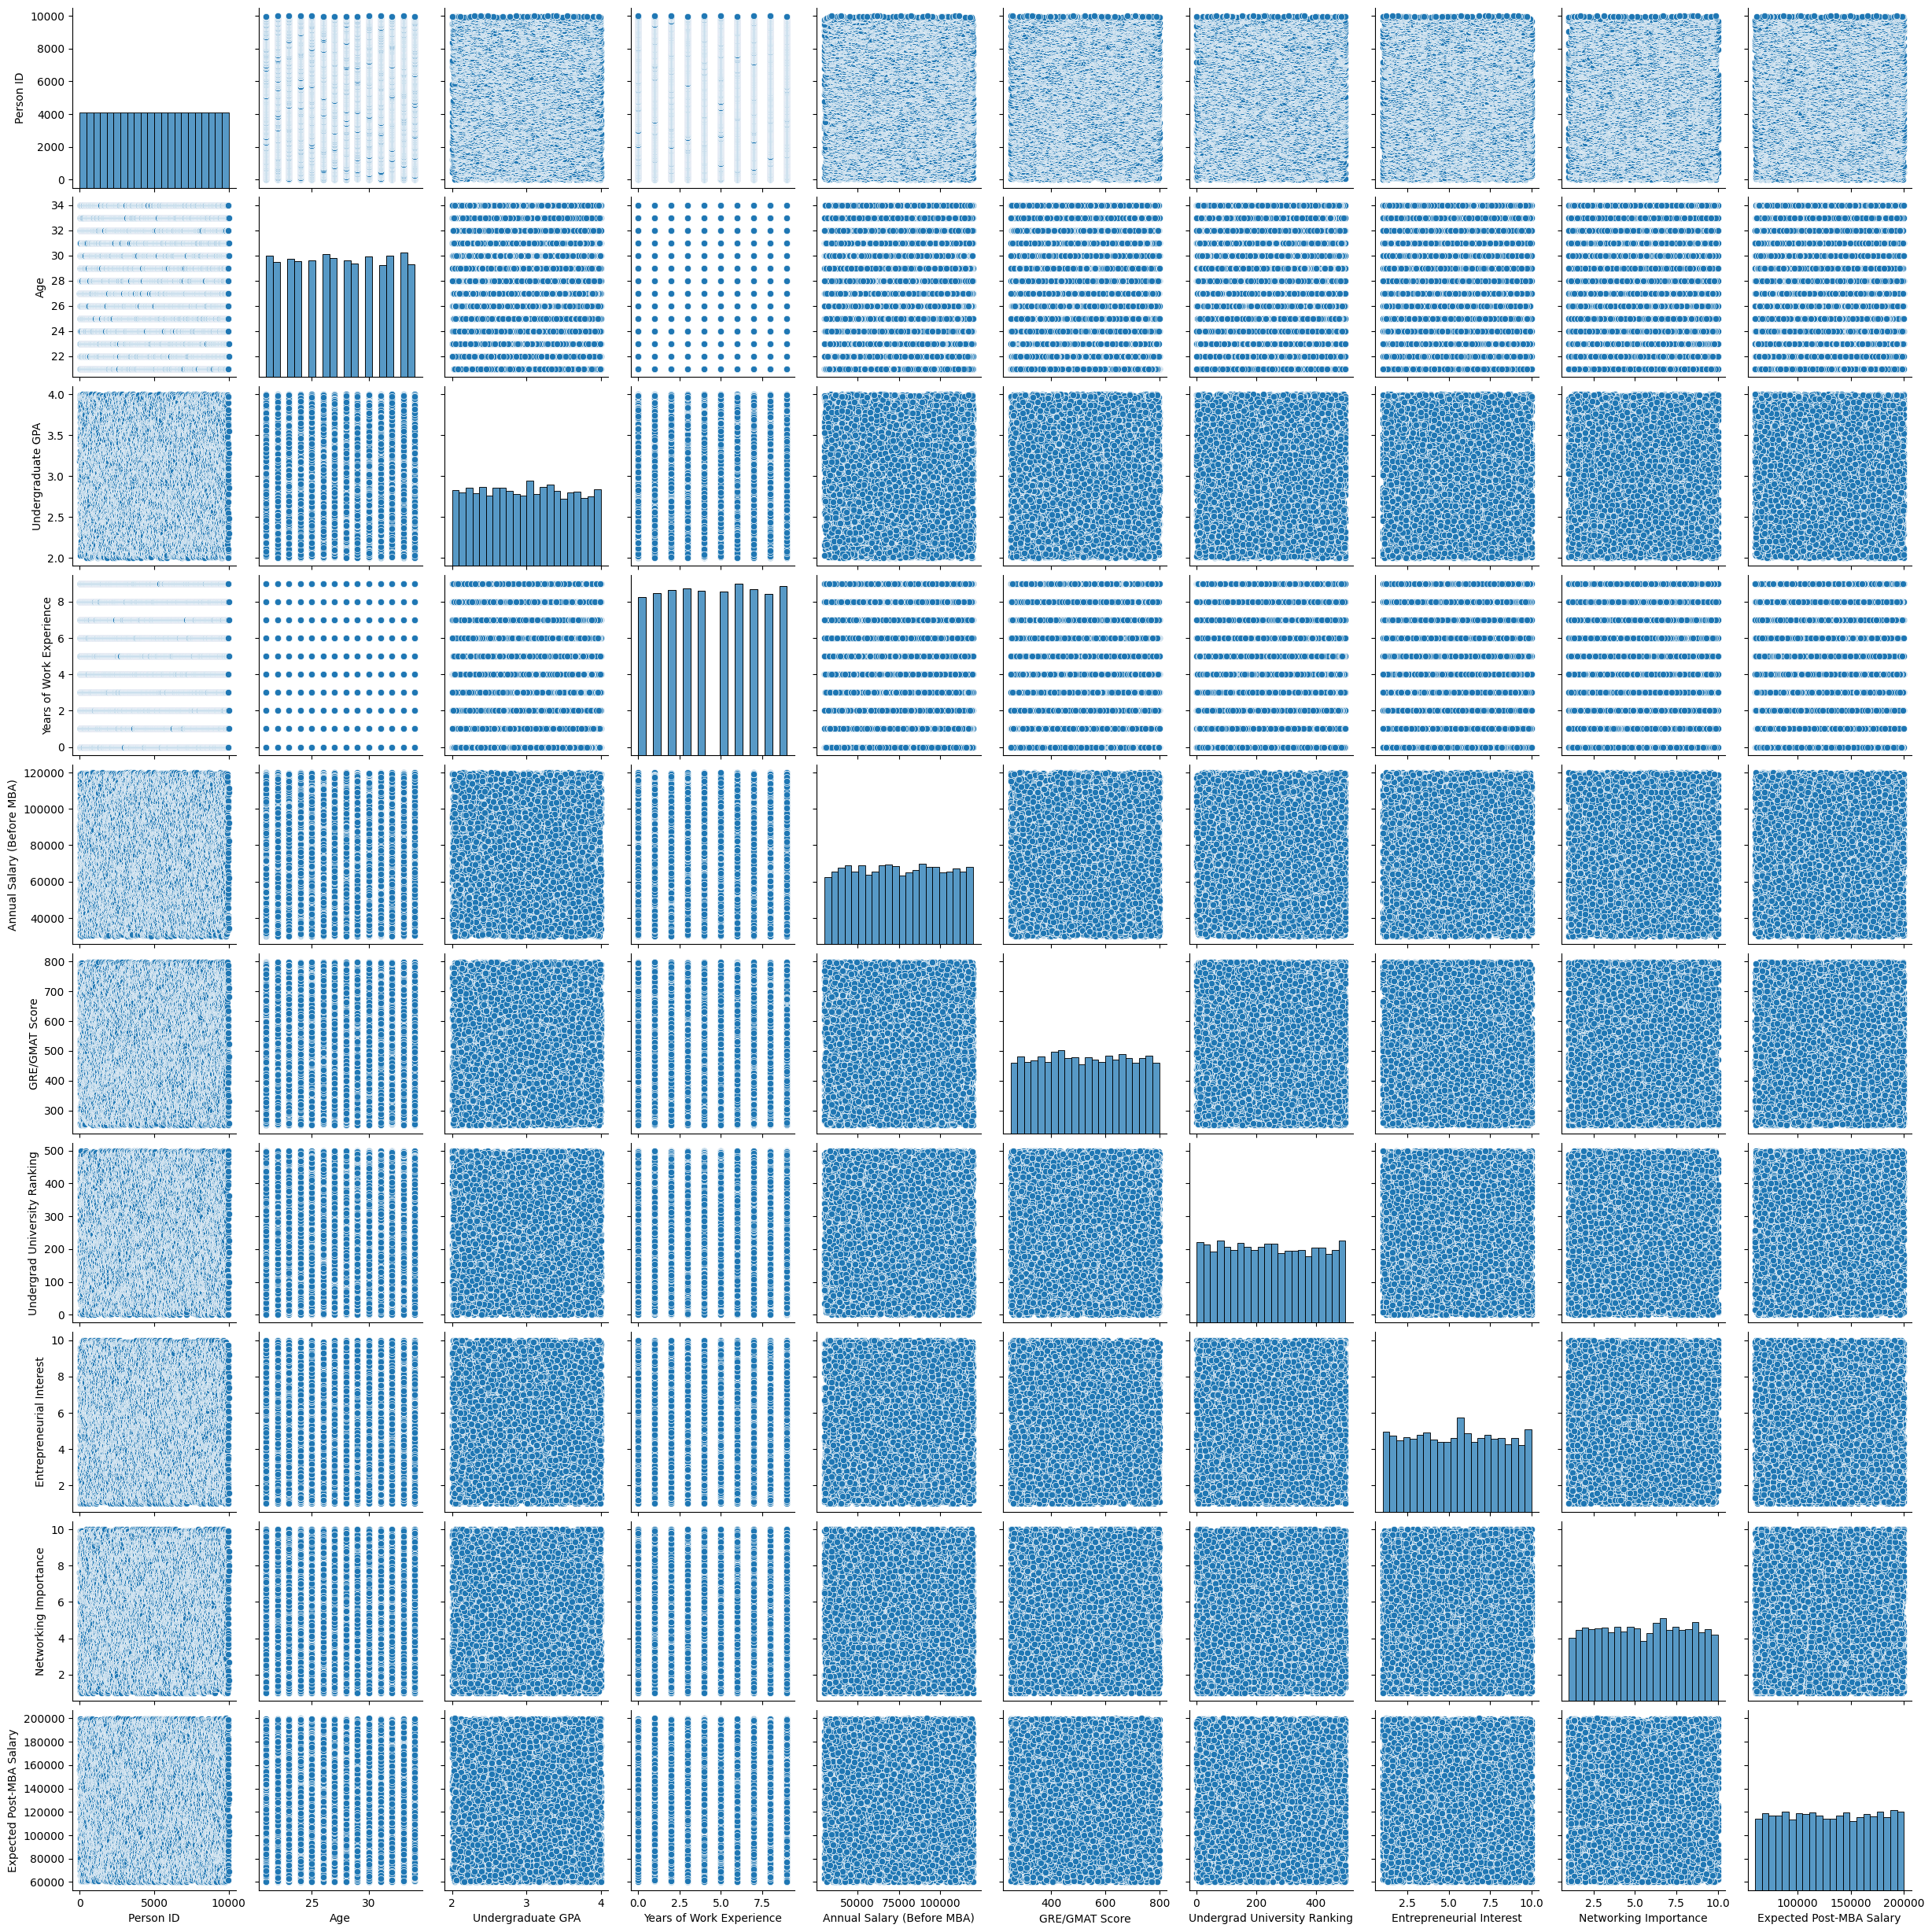

In [11]:
sns.pairplot(df)

<Axes: >

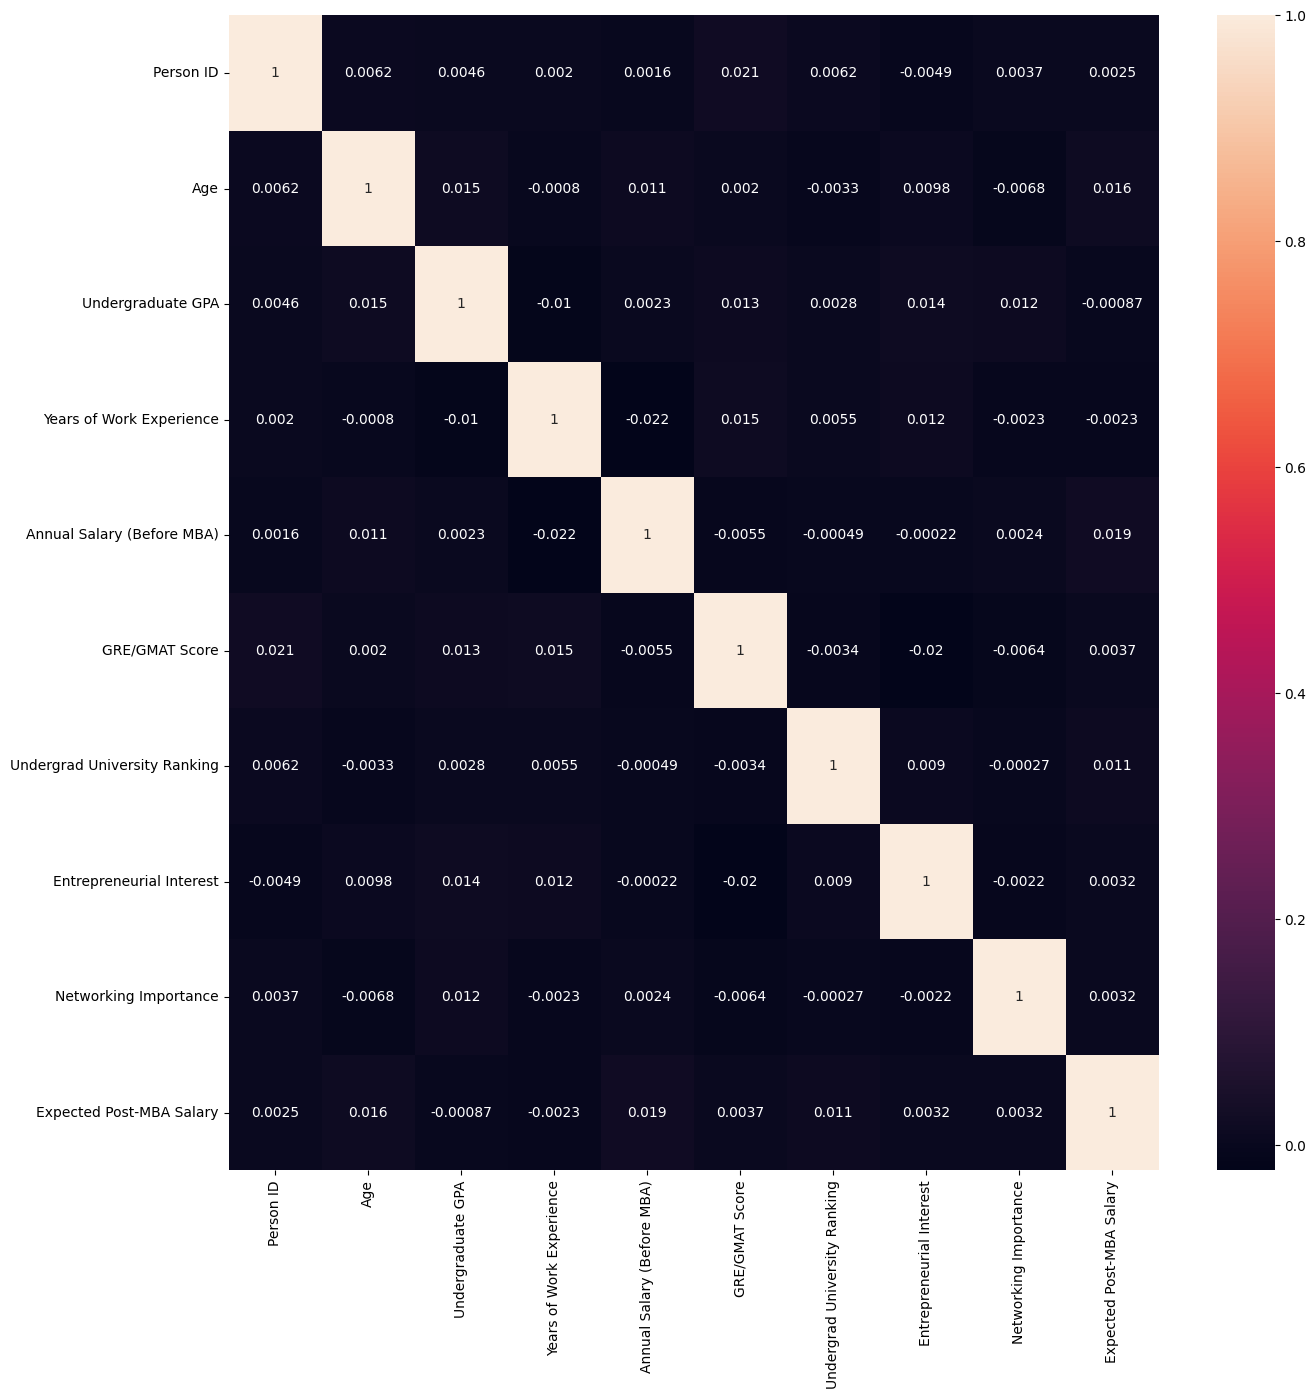

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)

It seems there's no correlation between numerical features.

Stay tuned for updates...